
# Predição do COVOD-19 por 30 Dias

In [1]:
import pandas as pd
import numpy as np

In [3]:
from fbprophet import Prophet

In [4]:
covid = pd.read_csv('https://raw.githubusercontent.com/sandeco/CanalSandeco/master/covid-19/covid_19_data.csv')

In [5]:
covid.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
7009,7010,03/19/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
7010,7011,03/19/2020,NaN,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0
7011,7012,03/19/2020,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0
7012,7013,03/19/2020,NaN,The Bahamas,2020-03-19T12:13:38,0.0,0.0,0.0
7013,7014,03/19/2020,NaN,The Gambia,2020-03-18T14:13:56,0.0,0.0,0.0


<h5>#Mudando Alguns nome de Colunas</h5>

In [6]:
covid.rename(columns={'ObservationDate':'Date','Country/Region':'País'}, inplace=True)

In [7]:
covid.tail()


,SNo,Date,Province/State,País,Last Update,Confirmed,Deaths,Recovered
7009,7010,03/19/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
7010,7011,03/19/2020,NaN,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0
7011,7012,03/19/2020,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0
7012,7013,03/19/2020,NaN,The Bahamas,2020-03-19T12:13:38,0.0,0.0,0.0
7013,7014,03/19/2020,NaN,The Gambia,2020-03-18T14:13:56,0.0,0.0,0.0


<h2>Agrupando os Dados por Data:</h2>

In [12]:
mortes = covid.groupby('Date').sum()['Deaths'].reset_index()

In [13]:
mortes.tail()

,Date,Deaths
53,03/15/2020,6440.0
54,03/16/2020,7126.0
55,03/17/2020,7905.0
56,03/18/2020,8733.0
57,03/19/2020,9867.0


<h4>Plotando mortes Por dia </h4>

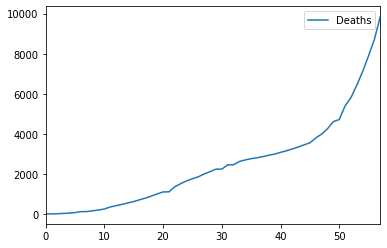

In [16]:
mortes.plot()

<h2>Criando as Colunas </h2>

In [19]:
mortes.columns = ['ds','y']

In [21]:
mortes.tail()

,ds,y
53,03/15/2020,6440.0
54,03/16/2020,7126.0
55,03/17/2020,7905.0
56,03/18/2020,8733.0
57,03/19/2020,9867.0


In [23]:
mortes['ds'] = pd.to_datetime(mortes['ds'])
mortes.tail()

,ds,y
53,2020-03-15,6440.0
54,2020-03-16,7126.0
55,2020-03-17,7905.0
56,2020-03-18,8733.0
57,2020-03-19,9867.0


<h3>Previsão de MORTES da COVID-19 no Mundo</h3>
Vamos realizar um previsão de uma semana(periods=30), com intervalos de 95%

<h2>Confiança</h2>
<h5>Nas séries Temporais a tendencia muda o tempo todo. Isso é histórico. Por isso é impossivel ter certeza que teremos a coisa mais
razoável possivel e assumimos que o futuro sofrera mudanças de tendência.
Nesse caso, assumiremos um intervalo de confiança de 95%, ou seja admintimos um erro de 5%.<h/5>

In [58]:
dias = 30

In [59]:
m = Prophet(interval_width=0.95)
m.fit(mortes)
futuro = m.make_future_dataframe(periods=dias)
futuro.tail(dias)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
58,2020-03-20
59,2020-03-21
60,2020-03-22
61,2020-03-23
62,2020-03-24
63,2020-03-25
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29


In [60]:
previsao = m.predict(futuro)
previsao.head(dias)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-353.751702,-924.606782,343.477552,-353.751702,-353.751702,59.363347,59.363347,59.363347,59.363347,59.363347,59.363347,0.0,0.0,0.0,-294.388355
1,2020-01-23,-276.825012,-760.955321,463.996517,-276.825012,-276.825012,110.821693,110.821693,110.821693,110.821693,110.821693,110.821693,0.0,0.0,0.0,-166.003319
2,2020-01-24,-199.898322,-852.161717,342.090071,-199.898322,-199.898322,-46.352308,-46.352308,-46.352308,-46.352308,-46.352308,-46.352308,0.0,0.0,0.0,-246.250630
3,2020-01-25,-122.971632,-776.120237,466.395208,-122.971632,-122.971632,-37.721156,-37.721156,-37.721156,-37.721156,-37.721156,-37.721156,0.0,0.0,0.0,-160.692788
4,2020-01-26,-46.044942,-734.141512,516.352180,-46.044942,-46.044942,-46.535627,-46.535627,-46.535627,-46.535627,-46.535627,-46.535627,0.0,0.0,0.0,-92.580568
5,2020-01-27,30.881748,-630.598946,611.583337,30.881748,30.881748,-34.120435,-34.120435,-34.120435,-34.120435,-34.120435,-34.120435,0.0,0.0,0.0,-3.238687
6,2020-01-28,107.809774,-455.520430,722.562316,107.809774,107.809774,-5.455514,-5.455514,-5.455514,-5.455514,-5.455514,-5.455514,0.0,0.0,0.0,102.354260
7,2020-01-29,184.737800,-368.025615,903.930716,184.737800,184.737800,59.363347,59.363347,59.363347,59.363347,59.363347,59.363347,0.0,0.0,0.0,244.101147
8,2020-01-30,261.680325,-197.674550,988.351987,261.680325,261.680325,110.821693,110.821693,110.821693,110.821693,110.821693,110.821693,0.0,0.0,0.0,372.502018
9,2020-01-31,338.622849,-345.772621,910.091936,338.622849,338.622849,-46.352308,-46.352308,-46.352308,-46.352308,-46.352308,-46.352308,0.0,0.0,0.0,292.270541


In [61]:
previsao[['ds', 'yhat_lower', 'yhat', 'yhat_upper']].tail(dias)

,ds,yhat_lower,yhat,yhat_upper
58,2020-03-20,8066.122660,8708.340669,9282.349419
59,2020-03-21,8521.992183,9119.697805,9723.364519
60,2020-03-22,8881.419606,9513.609318,10135.429637
61,2020-03-23,9307.773752,9928.750495,10544.718459
62,2020-03-24,9719.992680,10360.141399,10943.112322
63,2020-03-25,10169.389986,10827.686244,11516.770676
64,2020-03-26,10566.431781,11281.870574,11900.116558
65,2020-03-27,10829.237651,11527.422557,12186.911424
66,2020-03-28,11141.067889,11938.779692,12646.329445
67,2020-03-29,11596.309371,12332.691206,13064.160531


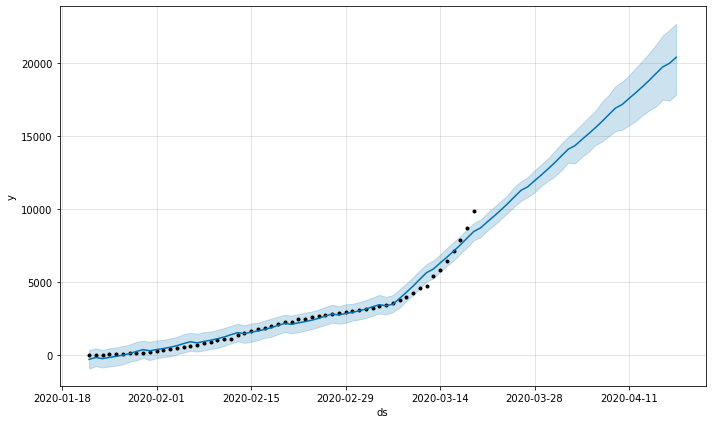

In [62]:
confirmed_forecast_plot = m.plot(previsao)